<a href="https://colab.research.google.com/github/harujem/dataAnalysis/blob/main/3_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EB%B6%84%EB%A5%98_1_%EC%82%AC%EC%9D%B4%ED%82%B7%EB%9F%B0_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89%EC%83%9D%EC%A1%B4%EC%9E%90%EC%98%88%EC%B8%A1_%EB%B0%B0%ED%8F%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [실습] 타이타닉 생존자 예측하기 : 분류

In [1]:
# (코랩에서)한글폰트 설치하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 코랩에서 위 코드를 실행시킨 후  반드시 코랩 메뉴: "런타임>런타임 다시 시작" 합니다.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,526 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121920 files and dire

In [1]:
# 코랩에서 한글 폰트 종류와 이름이 win과 다를 수 있다!!!
# 코랩: NanumGothic, 윈도우: Malgun Gothic
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family': 'NanumGothic',
                     'font.size': 12,
                     'figure.figsize': (6, 4),
                     'axes.unicode_minus':  False }) # 폰트 설정

### 참고
-  https://www.kaggle.com/competitions/titanic/code



### 목표
- 타이타닉 데이터를 이용하여 데이터 **변수간의 상관관계**를 확인해 본다.
- 사이킷런 분류 모델을 이용하여 타이타닉 **생존자를 예측하는 모델**을 만들어 본다.
- **모델을 평가**해 본다.

### 모델
- **로지스틱 회귀**
- └ 분류에 사용되는 회기 방법

### 평가지표
- 정확도(accuracy_score)
- 정밀도(precision_score)
- 재현율(recall_score)
- F1점수(f1_score)
- 오차행렬(confusion_matrix)
- ROC정확도(roc_auc_score)



---



## 1. 데이터 준비하기

- 다운로드:  https://www.kaggle.com/competitions/titanic/data
- train.csv : 모델 학습에 사용되는 데이터 파일
- test.csv : 예측에 사용되는 탑승객들의 데이터 파일

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# plt.rc('font', family='AppleGothic')            # for 맥 노트북 사용자
# plt.rcParams['font.family'] = 'Malgun Gothic'  # for 윈도우 노트북 사용자
plt.rcParams['axes.unicode_minus'] = False     # 그래프에서 (-)숫자표시
plt.rcParams['figure.figsize'] = (5,3)

DIR = './'
train = pd.read_csv(DIR+'train.csv')
test = pd.read_csv(DIR+'test.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()
# test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# object 는 컴퓨터가 읽을 수 있도록 숫자 데이터로 변환해야 할것이라는 예측을 할 수 있다
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
# 전체에 대한 기술 통계 보기
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Survived 의 기술 통계만 보기
train['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

----------------------

## 2. 데이터 전처리

### 2-1. 기본 정보 확인

#### 데이터의 개수 확인

In [8]:
print(train.shape, test.shape)

(891, 12) (418, 11)


#### 컬럼정보

In [9]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

| 필드명 | 설명 | 값 종류 |
|------|------|------|
|PassengerId |승객번호  |	|
|Survived |생존여부  |0=No, 1=Yes|
|Pclass |티켓 클래스 |1=1st, 2=2nd, 3=3rd|
|Name |이름  |	|
|Sex |성별  |male=남, female=여	|
|Age |나이  |	|
|SibSp |타이타닉 밖의 형제자매/부부의 수  |	|
|Parch |타이타닉 밖의 부모/자식의 수 |	|
|Ticket |티켓 번호  |	|
|Fare |티켓 가격  |	|
|Cabin |객실 번호  |	|
|Embarked |승선항구  |C=Cherbourg, Q=Queenstown, S=Southampton|

#### 2-2.시각화

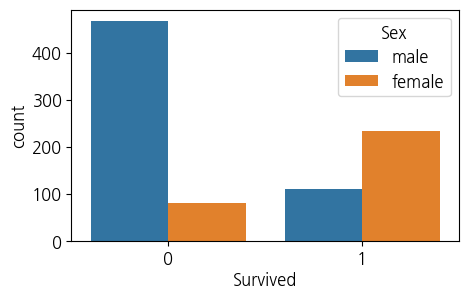

In [11]:
# 성별 생존 현황
sns.countplot(data=train, x='Survived', hue='Sex' )     # sns 는 seaborn 라이브러리를 말함
plt.show()

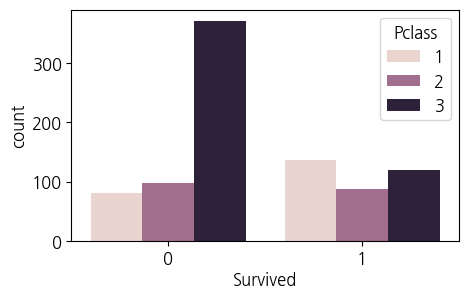

In [12]:
# 티켓등급별 생존 현황
sns.countplot(data=train, x='Survived', hue='Pclass' )
plt.show()

In [2]:
# 나이별 생존 현황

# 나이를 몇개의 등급을 나눈후 처리한다.
bin = [0, 18, 25, 35, 60, 100]
group_names = ['Baby', 'Youth', 'YoungAdult', 'MiddleAged', 'Senior']
train['AgeGroup'] = pd.cut(train['Age'], bins=bin, labels=group_names)
train['AgeGroup'].value_counts()

AgeGroup
YoungAdult    196
MiddleAged    195
Youth         162
Baby          139
Senior         22
Name: count, dtype: int64

In [3]:
# 위에서 AgeGroup 이라는 컬럼을 만들어서 보기
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Youth
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,MiddleAged


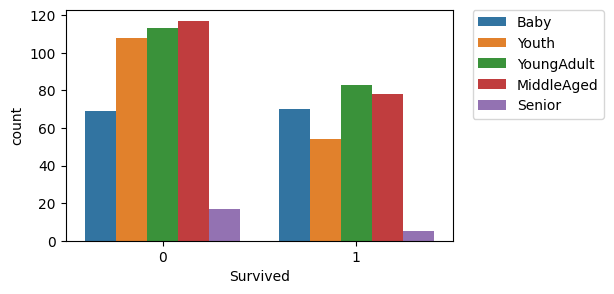

In [4]:
# 막대 그래프 보기
sns.countplot(data=train, x='Survived', hue='AgeGroup' )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# 원래대로 AgeGroup 컬럼 삭제하기 - 그냥 보고 확인하기 위해 만들었었기 때문에 삭제
train.drop('AgeGroup', axis=1, inplace=True)

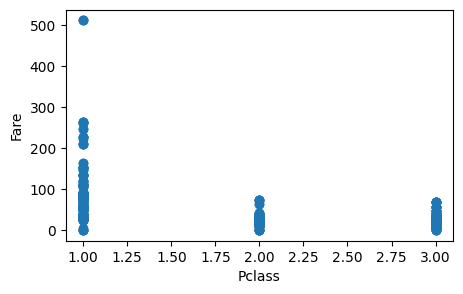

In [5]:
# Pclass와 Fare 관계
plt.scatter(train.Pclass, train.Fare)
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

#### 상관계수
- 두 개의 변수가 같이 일어나는 강도를 나타내는 수치
- **-1에서 1**사이의 값을 지닙니다.
- -1이나 1인 수치는 현실 세계에서 관측되기 힘든 수치입니다.
- 분야별로 기준을 정하는 것에 따라 달라지겠지만, **보통 0.4이상**이면 두 개의 변수간에 상관성이 있다고 얘기합니다.

In [6]:
train.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


- 특정 컬럼과 나머지 컬럼간의 상관계수(숫자만 가능)

In [7]:
# train.corr(numeric_only=True)['Survived'].sort_values(ascending=False)
train.corrwith(train['Survived'], numeric_only=True).sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
dtype: float64

#### 상관계수 시각화하기

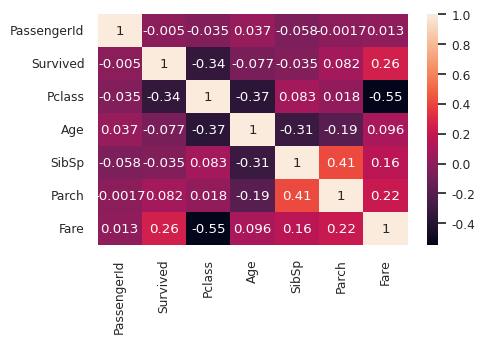

In [8]:
import seaborn as sns

# sns.heatmap 폰트 사이즈 작게
sns.set(font_scale=0.8)
sns.heatmap(train.corr(numeric_only=True), annot=True)
plt.show()

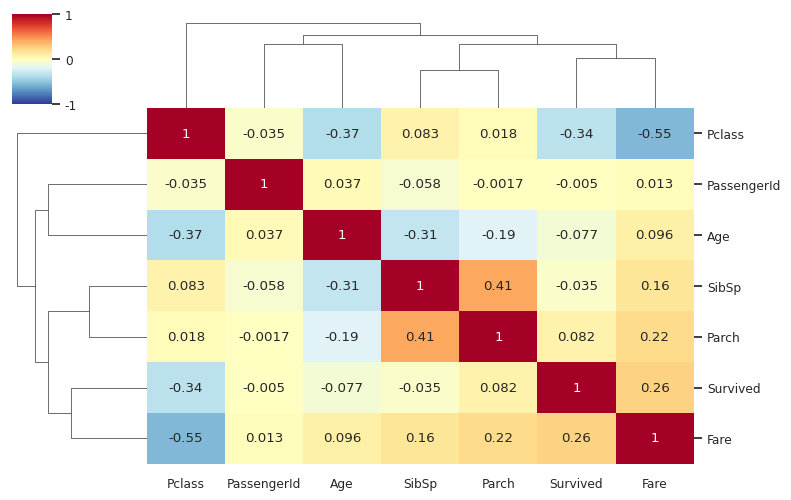

In [9]:
# sns.clustermap
sns.clustermap(train.corr(numeric_only=True),
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
               figsize=(8,5)
)

**상관계수를 통해 통해 알 수 있는 내용**
- (Sex, Survived), (SibSp,Parch) 양의 상관관계
- (Fare, Pclass) 음의 상관관계

### 2-3.데이터 처리

#### 1) 결측치 처리
- Non-Null Count 를 통해 확인한 내용
- **Age** : 결측치 데이터 삭제
- **Cabin** : 조치 안함
- **Embarked** : 결측치(최빈값 채움) + 범주형 데이터로 변환한다.(C,Q,S=0,1,2)

In [10]:
train.isnull().sum()
# test.info()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### 결측치 데이터 삭제 : Age

In [11]:
train.dropna(subset=['Age'], how='all', inplace=True)
# test.dropna(subset=['Age'], how='all', inplace=True)
train.Age.isnull().sum()
# train['Age'].isnull().sum() 이렇게 쓰는 것과 같은 의미

0

#### 결측치 데이터 : Embarked(최빈값으로 대체)

In [13]:
# 최빈값(가장 자주 나오는 값)
train.Embarked.dtype # dtype('0') -> object type
train.Embarked.value_counts()

Embarked
S    554
C    130
Q     28
Name: count, dtype: int64

In [14]:
# Embarked 결측치 값을 최빈값(S)으로 대체
train['Embarked'] = train['Embarked'].fillna('S')
train['Embarked'].isnull().sum()
# test['Embarked'] = test['Embarked'].fillna('S')

0

#### 2) 범주형 데이터  숫자로 변환(인코딩)
- 성별(Sex): 0, 1 숫자로 변환

In [15]:
train['Sex'] = train['Sex'].replace('male', 0)
train['Sex'] = train['Sex'].replace('female', 1)
# test['Sex'] = test['Sex'].replace('male', 0)
# test['Sex'] = test['Sex'].replace('female', 1)
train['Sex'].value_counts()

Sex
0    453
1    261
Name: count, dtype: int64

- Embarked: C,Q,S=0,1,2

In [16]:
train['Embarked'] = train['Embarked'].replace('C', 0)
train['Embarked'] = train['Embarked'].replace('Q', 1)
train['Embarked'] = train['Embarked'].replace('S', 2)
# test['Embarked'] = test['Embarked'].replace('C', 0)
# test['Embarked'] = test['Embarked'].replace('Q', 1)
# test['Embarked'] = test['Embarked'].replace('S', 2)
train['Embarked'].value_counts()

Embarked
2    556
0    130
1     28
Name: count, dtype: int64

In [17]:
train['Embarked'].dtypes

dtype('int64')

- Embarked 컬럼 데이터형 int로 변환

In [18]:
train['Embarked'] = train['Embarked'].astype('int')
# test['Embarked'] = test['Embarked'].astype('int')

### [실습] test 데이터 전처리 하기
 - 결측치 처리 : Age (결측치 데이터 삭제), Fare(중앙값 대체), Cabin(조치 안함)
 - 범주형 데이터 숫자로 변환(인코딩)

- 결측치 처리 : Age (결측치 데이터 삭제)

In [20]:
test.head(2)
test.isnull().sum()

# test 에서 Age 컬럼 중 결측치 데이터 삭제하기

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

- 결측치 처리 : Fare(중앙값 대체)

#### 3) 정규화 & 표준화

- **정규화(Normalization)** : -1 ~ 1 사이의 값으로 변환
- **표준화(Standardization)** : 평균이 0이고 표준편차가 1인 값으로 변환
- 머신러닝 성능 향상을 위한 방법
- 정규화와 표준화는 모두 머신러닝 알고리즘을 훈련시키는데 있어서 사용되는 특성(feature)들이 모두 비슷한 영향력을 행사하도록 값을 변환해주는 기술


In [ ]:
def normalize(x):
    return (x-x.min())/(x.max()-x.min())

def standardscaler(x):
    return (x-x.mean())/x.std()

-  표준화 적용: 'Fare' 컬럼

In [ ]:
train.describe()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# train[['Fare']] = scaler.fit_transform(train[['Fare']])
scaler.fit(train[['Fare']])
train[['Fare']] = scaler.transform(train[['Fare']])

test[['Fare']] = scaler.transform(test[['Fare']])

train['Fare']

### 2-4. 최종 종속변수와 독립변수
- 'Age' 컬럼을 종속변수로 사용하지 않는 이유: 편차가 너무 크고 null값이 너무 많았기 때문.
- **종속변수** : Survived
- **독립변수** : Pclass, Sex, SibSp, Parch, Fare, Embarked     

In [ ]:
train.head()

feature = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = ['Survived']

# X = train[feature]
# Y = train[target]
# X_test = test[feature]
# Y_test = test[target]
X
Y


### 2-5. 시각화

In [ ]:
pd.concat([X, Y], axis=1).head()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(pd.concat([X, Y], axis=1), hue='Survived')
plt.show()

---------------------

## 3. 모델링

### 3-1. 학습용 데이터 준비

In [ ]:
pd.concat([X, Y], axis=1)

### 3-2. 학습용, 테스트 데이터 분리하기

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

### 3-3.모델 훈련 및 테스트, 성능평가

#### # 로직스틱 회귀 : LogisticRegression()
- 분류: 시그이드 함수 사용 (이진 분류에 적용)
- 평가 지표 : 오차행렬(confusion_matrix) 정확도 사용

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# 학습모델(분류) : 로지스틱 회귀
model = LogisticRegression()

# 모델 훈련
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)
print(f'y_pred : {y_pred}')


# 정확도 출력
accuracy = model.score(X_test, y_test)
print(f'accuracy : {accuracy}')


# 혼돈행렬 시각화
labels = 'die','alive'
cm = confusion_matrix(y_test, y_pred) # 혼돈 행렬 구하기
ConfusionMatrixDisplay(cm, display_labels=labels).plot(cmap='Blues')
plt.title(f'accuracy:{np.round(accuracy, 2)}')
plt.show()

# 평가지표
print(f'정확도 : {accuracy_score(y_test, y_pred)}')
print(f'정밀도 : {precision_score(y_test, y_pred)}')
print(f'재현율 : {recall_score(y_test, y_pred)}')
print(f'F1     : {f1_score(y_test, y_pred)}')
print(f'ROC_ACU: {roc_auc_score(y_test, y_pred)}')

#### X_test 결과 값 비교

In [ ]:
X_test_compare =  X_test.copy()
X_test_compare['Survived'] = y_test
X_test_compare['Predict'] = y_pred
X_test_compare

-------------------

THE END